<a href="https://colab.research.google.com/github/opi-lab/optical-metrology-2021/blob/gh-pages/notebooks/sl_phase_shifting_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Phase shifting

Andres Marrugo, PhD      
Universidad Tecnológica de Bolívar

In this activity, we will work with fringe projection system for 3D reconstruction. 

The figure shows a telecentric fringe projection system both in projection and in observation. A telecentric 50 mm focal length CCD camera is used, located at $l = 500$ mm from the reference plane RP. The fringes are projected at an angle $\theta = 45^\circ$ from the left, as shown. The pitch of the fringes is $P = 1.6875$ mm.

![laser spot triangulation](https://github.com/opi-lab/optical-metrology-2021/raw/gh-pages/figures/fringe-projection.png)

The CCD sensor is 8 mm wide and has 512x512 pixels. The images are acquired in 8 bits. $N=4$ images were stored, with $\delta_k = \frac{P}{4}$  displacements both for the reference plane and for the object. Each file has a number that corresponds to the number of times $\frac{\pi}{2}$ has been displaced, thus, ``Franjas_Dec_Obj_2.jpg`` corresponds to the fringe image on the object where $\frac{\pi}{2}$ has been displaced 2 times, that is, it corresponds to a $\pi$ displacement.

### Analysis 

Use the N-step shift algorithm for $N=4$ to obtain the continuous phase of the fringes on the reference plane $\phi_{\mathrm{rp}}$ and on the object $\phi_{\mathrm{obj}}$, as

\begin{equation}
\phi(x,y) = -\tan^{-1}\left( \frac{\sum_{k=1}^{N}I_k \cdot \sin \delta_k}{\sum_{k=1}^{N}I_k \cdot \cos \delta_k} \right) \enspace,
\end{equation}

where $\delta_k = \frac{2k\pi}{N}$ is the phase shift. Subtracting the two phases gives the object-only phase as,

\begin{equation}
\phi_{\mathrm{obj-only}} = \phi_{\mathrm{obj}} - \phi_{\mathrm{rp}}
\end{equation}

Using the telecentric equation, the height for each point is calculated as,

\begin{equation}
z(x,y) = \frac{\phi(x,y)}{2\pi} \cdot \frac{P}{\tan(\theta)} \enspace.
\end{equation}


## Solution

In [ ]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import glob
import cv2

In [ ]:
# We download the images
!wget https://github.com/opi-lab/optical-metrology-2021/raw/gh-pages/data/data_phase_shifting.zip


--2021-10-22 01:21:19--  https://github.com/opi-lab/optical-metrology-2021/raw/gh-pages/data/data_phase_shifting.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opi-lab/optical-metrology-2021/gh-pages/data/data_phase_shifting.zip [following]
--2021-10-22 01:21:19--  https://raw.githubusercontent.com/opi-lab/optical-metrology-2021/gh-pages/data/data_phase_shifting.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385289 (376K) [application/zip]
Saving to: ‘data_phase_shifting.zip’

data_phase_shifting 100%[===================>] 376.26K  --.-KB/s    in 0.03s   

2021-10-22 01:21:19 (10.5 MB/

In [ ]:
# unzip the images
!unzip /content/data_phase_shifting.zip

Archive:  /content/data_phase_shifting.zip
  inflating: Franjas_Dec_Obj_0.jpg   
  inflating: Franjas_Dec_Obj_1.jpg   
  inflating: Franjas_Dec_Obj_2.jpg   
  inflating: Franjas_Dec_Obj_3.jpg   
  inflating: Franjas_TF_PR_0.jpg     
  inflating: Franjas_TF_PR_1.jpg     
  inflating: Franjas_TF_PR_2.jpg     
  inflating: Franjas_TF_PR_3.jpg     


In [ ]:
# Let's load several images

obj_list = sorted(glob.glob('Franjas_Dec*'))
pr_list = sorted(glob.glob('Franjas_TF*'))

In [ ]:
obj = []
pr = []

for i in range(0, len(obj_list)):
        im1 = cv2.imread(obj_list[i], 0)
        im2 = cv2.imread(pr_list[i], 0)
        obj.append(im1.astype(np.float32))
        pr.append(im2.astype(np.float32))

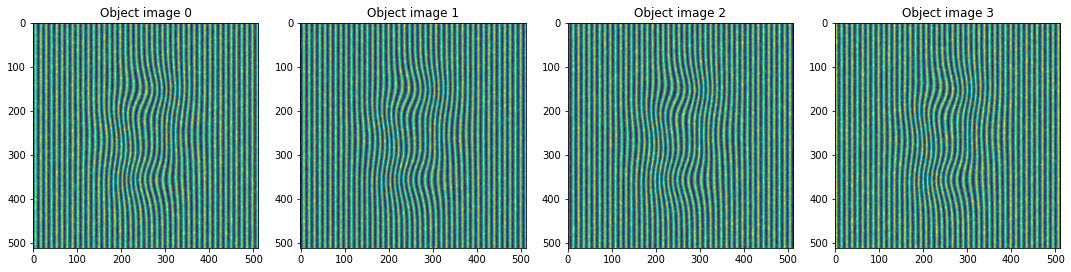

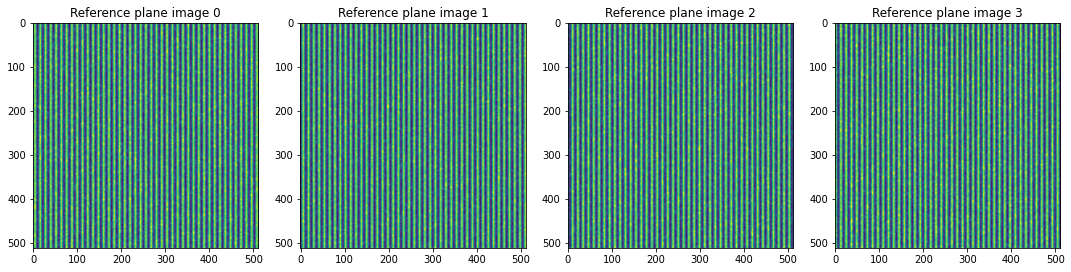

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15,15))
for k in range(0, len(obj_list)):
  # i, j = np.unravel_index(k, (1, 4))
  # axs[i, j].imshow(obj[k])
  # axs[i, j].set_title('Object image {}'.format(k))
  axs[k].imshow(obj[k])
  axs[k].set_title('Object image {}'.format(k))


fig.tight_layout()

fig, axs = plt.subplots(1, 4, figsize=(15,15))
for k in range(0, len(pr_list)):
  # i, j = np.unravel_index(k, (1, 4))
  # axs[i, j].imshow(obj[k])
  # axs[i, j].set_title('Object image {}'.format(k))
  axs[k].imshow(pr[k])
  axs[k].set_title('Reference plane image {}'.format(k))


fig.tight_layout()


In [1]:
# Use the phase recovery N-step algorithm 

def NStepPhaseShifting(imgs, N):
    delta = 2*np.pi*np.arange(1,N+1)/N

    sumIsin, sumIcos = 0., 0.
    for fname, deltak in zip(imgs, delta):
        I = cv2.imread(fname, 0)
        sumIsin += I*np.sin(deltak)
        sumIcos += I*np.cos(deltak)

    return -np.arctan2(sumIsin, sumIcos)

Franjas_Dec_Obj_0.jpg
1.5707963267948966
Franjas_Dec_Obj_1.jpg
3.141592653589793
Franjas_Dec_Obj_2.jpg
4.71238898038469
Franjas_Dec_Obj_3.jpg
6.283185307179586
Franjas_TF_PR_0.jpg
1.5707963267948966
Franjas_TF_PR_1.jpg
3.141592653589793
Franjas_TF_PR_2.jpg
4.71238898038469
Franjas_TF_PR_3.jpg
6.283185307179586


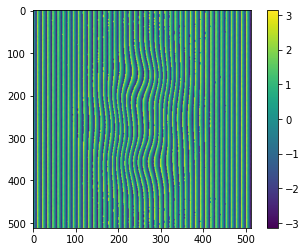

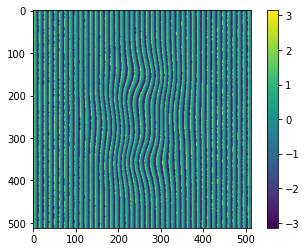

In [ ]:
# Use the above function for recovering phase from the object 
# and the reference plance

obj_phase = ?

pr_phase = ?


plt.imshow(obj_phase)
plt.colorbar()
plt.show()



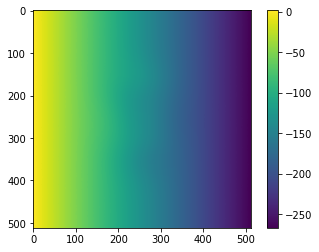

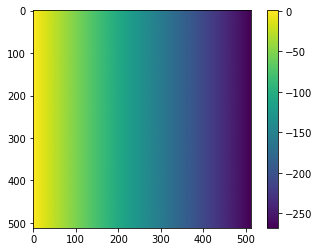

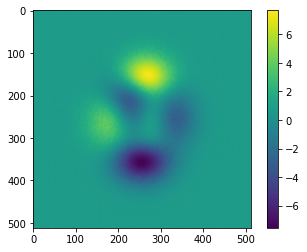

In [ ]:
# Recover the object-only phase

plt.imshow(obj_uphase)
plt.colorbar()
plt.show()

plt.imshow(pr_uphase)
plt.colorbar()
plt.show()

plt.imshow(delta_phase)
plt.colorbar()
plt.show()

In [ ]:
# Compute the z-height based on the phase and the telecentric equation 

z = ?

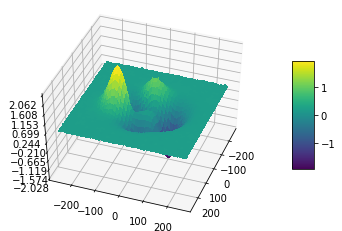

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
# import numpy as np

w, h = z.shape

X = np.linspace(-w/2, w/2, w)
Y = np.linspace(-h/2, h/2, h)
X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


# Plot the surface.
surf = ax.plot_surface(X, Y, z, cmap=cm.viridis,
                       linewidth=0, antialiased=False)

ax.view_init(45, 20) # Point of view for a better visualization

# Customize the z axis.
# ax.set_zlim(0, 25)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()